In [1]:
# Define autoreload
%load_ext autoreload
%autoreload 2

In [2]:
# Preamble
from model import FractionMLP
from training_defs import load_csv, test_train_split
import matplotlib.pyplot as plt
import torch

In [3]:
# Variables
input_size = 210 # 400-2490 nm (10 nm intervals)
hidden_size = 16 # Arbitrary
output_size = 3 # GV, NPV, soil

In [4]:
# NN setup
model = FractionMLP(input_size, hidden_size, output_size)
print(model.W1.dtype)

torch.float64


In [5]:
# This is my personal filepath. Change filepath for testing
#raw_data = load_csv('filepath')
raw_data = load_csv("/Users/galacticmilk/Desktop/Michael's folder/[UNI]/[UTAT]/[science]/FINCH-Science_SyntheticData/data/simpler_data_rwc.csv")

In [6]:
train_input, train_output, test_input, test_output = test_train_split(raw_data)
print(train_input.dtype)

torch.float64


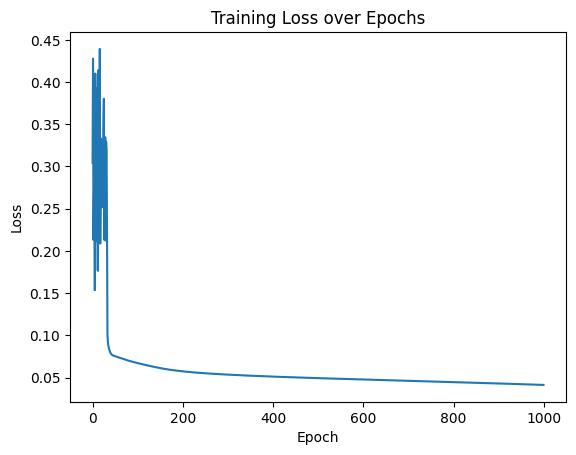

Test Accuracy: 15.24%


In [7]:
#Train the model, store loss
losses = model.train(train_input, train_output, epochs=1000, lr=0.1)

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()

with torch.no_grad():
    t_output = model.forward(test_input)
    # t_output = (t_output > 0.5).float() 
# accuracy = torch.mean((t_output == test_output).float())
accuracy = torch.mean(abs(t_output - test_output).float())
print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")

In [8]:
# Print the result of the model output and the actual fractions against one another.

record = 4

print(f"model fractions: {t_output[record][0]:.7f} gv, {t_output[record][1]:.7f} npv, {t_output[record][2]:.7f} soil")
print(f"actual fractions: {test_output[record][0]:.7f} gv, {test_output[record][1]:.7f} npv, {test_output[record][2]:.7f} soil")

model fractions: 0.1014644 gv, 0.4140963 npv, 0.4772359 soil
actual fractions: 0.1124260 gv, 0.3431950 npv, 0.5443790 soil


In [9]:
"""
Considerations:
    - Maybe randomising testing and training data even further?
"""

'\nConsiderations:\n    - Maybe randomising testing and training data even further?\n'